In [10]:
import numpy as np
import pymc3 as pm
import pandas as pd
import matplotlib.pyplot as plt


In [11]:
# SYNTHETIC DATA QUADRATIC FUNCTION 

In [12]:
np.random.seed(42)

n_samples=100
x=np.linspace(0,10,n_samples)
y=3*x**2 + 2*x + 5 +np.random.normal(scale=10, size=n_samples)

In [13]:
degree = 2
with pm.Model() as model:
    coeffs=pm.Normal('coeffs', mu=0,sd=10,shape=degree+1)
    y_pred=pm.math.dot(coeffs,np.vander(x,degree+1, increasing=True).T)
    likelihood=pm.Normal('y_obs',mu=y_pred,sd=10,observed=y)
    

WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.
C:\Users\Talha\anaconda3\envs\pm3bap\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [coeffs]


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 50 seconds.
C:\Users\Talha\anaconda3\envs\pm3bap\lib\site-packages\arviz\utils.py:175: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)
The number of effective samples is smaller than 25% for some parameters.
C:\Users\Talha\AppData\Local\Temp\ipykernel_11368\2750670694.py:4: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace)
C:\Users\Talha\anaconda3\envs\pm3bap\lib\site-packages\arviz\data\io_pymc3.py:96: F

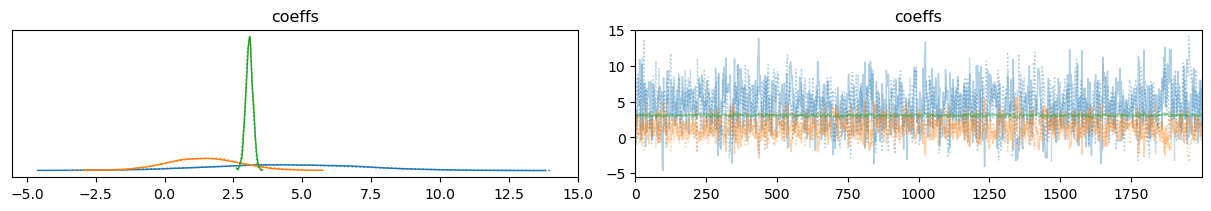

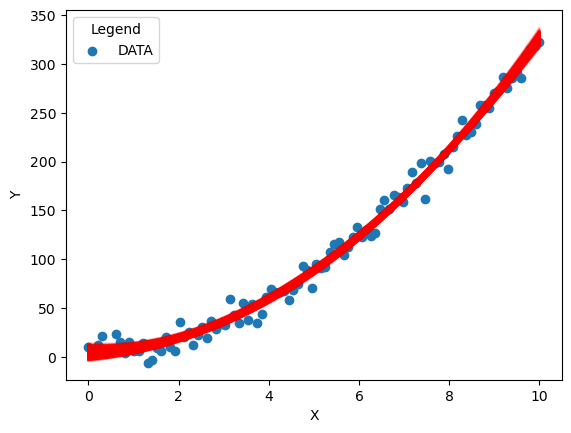

In [14]:
with model:
    trace = pm.sample(2000, tune=1000)

pm.traceplot(trace)
plt.show()

x_vals=np.linspace(0,10,100)
y_fitted=np.dot(np.vander(x_vals,degree+1,increasing=True),trace['coeffs'].T)
plt.scatter(x,y,label='DATA')
plt.plot(x_vals,y_fitted,color='r',alpha=0.1)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc='upper left', title='Legend', fontsize='medium')
plt.show()

In [15]:
# SYNTHETIC DATA CUBIC FUNCTION 

In [16]:
np.random.seed(42)

n_samples=100
x=np.linspace(0,10,n_samples)
y = 2 * x**3 - 3 * x**2 + 4 * x + 6 + np.random.normal(scale=10, size=n_samples)

In [17]:
degree = 3
with pm.Model() as model:
    coeffs=pm.Normal('coeffs', mu=0,sd=10,shape=degree+1)
    y_pred=pm.math.dot(coeffs,np.vander(x,degree+1, increasing=True).T)
    likelihood=pm.Normal('y_obs',mu=y_pred,sd=10,observed=y)

C:\Users\Talha\anaconda3\envs\pm3bap\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [coeffs]


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 87 seconds.
The number of effective samples is smaller than 25% for some parameters.
C:\Users\Talha\AppData\Local\Temp\ipykernel_11368\2750670694.py:4: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace)
C:\Users\Talha\anaconda3\envs\pm3bap\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


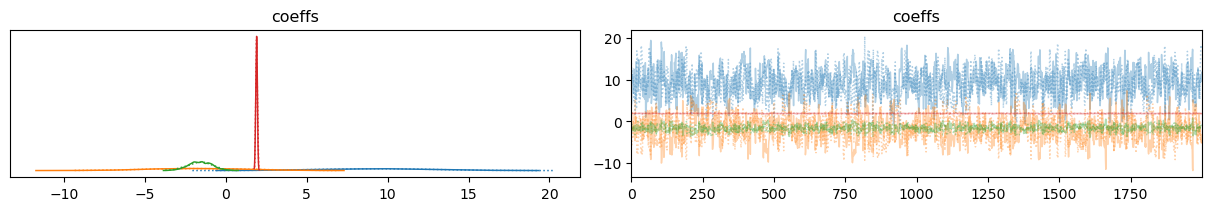

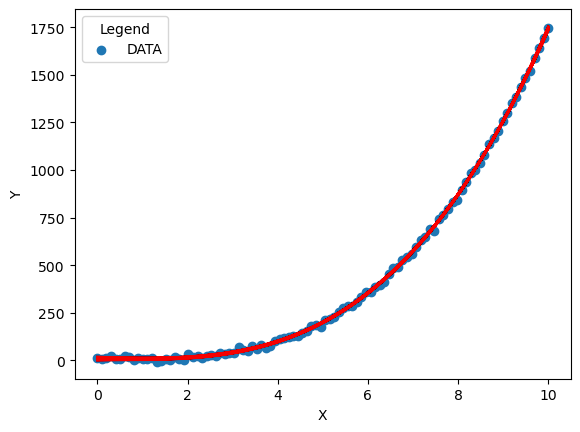

In [18]:
with model:
    trace = pm.sample(2000, tune=1000)

pm.traceplot(trace)
plt.show()

x_vals=np.linspace(0,10,100)
y_fitted=np.dot(np.vander(x_vals,degree+1,increasing=True),trace['coeffs'].T)
plt.scatter(x,y,label='DATA')
plt.plot(x_vals,y_fitted,color='r',alpha=0.1)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc='upper left', title='Legend', fontsize='medium')
plt.show()

In [19]:
# ANSCOMBE DATA QUADRATIC FUNCTION 

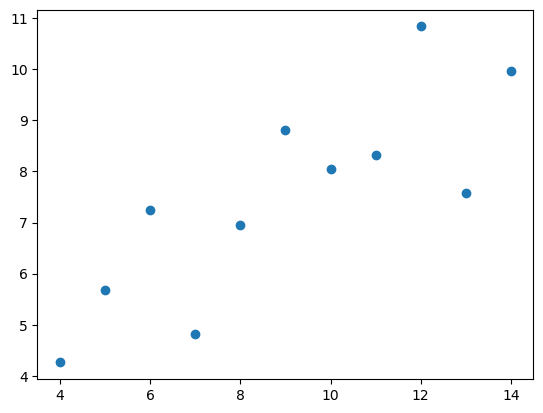

In [20]:
data = pd.read_csv('C:/Users/Talha/Downloads/anscombe.csv')
group1_data = data[data['group'].isin(['I'])]
# Extract the x and y values for Group I
x1 = group1_data['x'].values
y1 = group1_data['y'].values

plt.scatter(x1,y1)



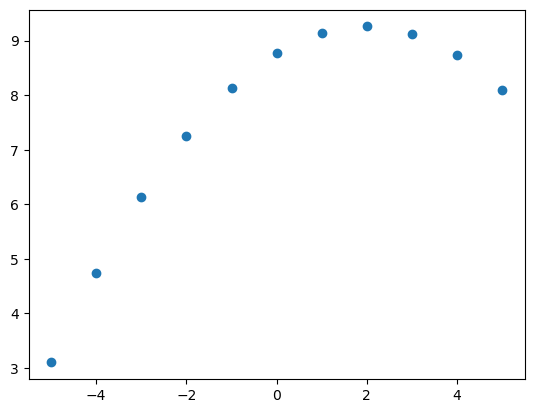

In [42]:
group2_data = data[data['group'].isin(['II'])]
# Extract the x and y values for Group I
x = group2_data['x'].values
y = group2_data['y'].values
x = x - x.mean()
plt.scatter(x,y)


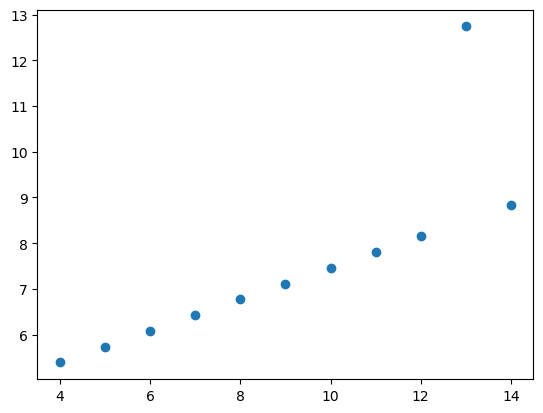

In [32]:
group3_data = data[data['group'].isin(['III'])]
# Extract the x and y values for Group I
x3 = group3_data['x'].values
y3 = group3_data['y'].values
plt.scatter(x,y)

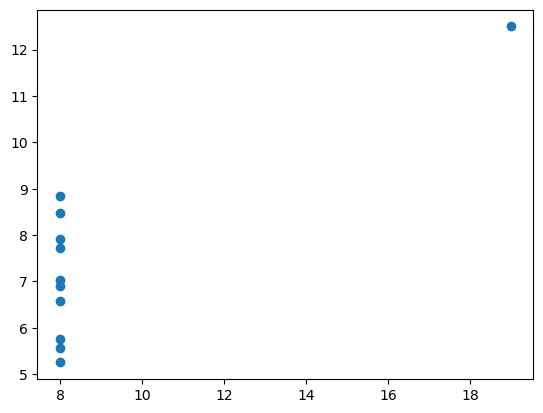

In [23]:



group4_data = data[data['group'].isin(['IV'])]
# Extract the x and y values for Group I
x4 = group4_data['x'].values
y4 = group4_data['y'].values
plt.scatter(x4,y4)

In [43]:
degree=2
with pm.Model() as model_poly:
    α = pm.Normal('α', mu=y.mean(), sd=1)
    β1 = pm.Normal('β1', mu=0, sd=1)
    β2 = pm.Normal('β2', mu=0, sd=1)
    ϵ = pm.HalfCauchy('ϵ', 5)
    mu = α + β1 * x + β2 * x**2
    y_pred = pm.Normal('y_pred', mu=mu, sd=ϵ, observed=y)
    trace_poly = pm.sample(2000)
    

C:\Users\Talha\anaconda3\envs\pm3bap\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [ϵ, β2, β1, α]


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 26 seconds.


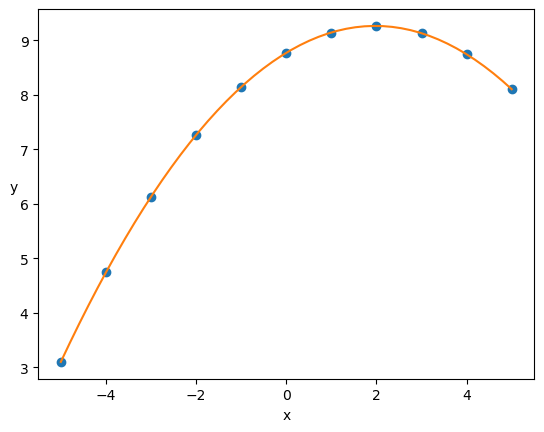

In [44]:
x_p = np.linspace(min(x), max(x))
y_p = trace_poly['α'].mean() + trace_poly['β1'].mean() * x_p + trace_poly['β2'].mean() * x_p**2

plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.plot(x_p, y_p, c='C1')

In [46]:
degree=3
with pm.Model() as model_poly:
    α = pm.Normal('α', mu=y.mean(), sd=1)
    β1 = pm.Normal('β1', mu=0, sd=1)
    β2 = pm.Normal('β2', mu=0, sd=1)
    β3 = pm.Normal('β3', mu=0, sd=1)
    ϵ = pm.HalfCauchy('ϵ', 5)
    mu = α + β1 * x + β2 * x**2 + β3 * x**3
    y_pred = pm.Normal('y_pred', mu=mu, sd=ϵ, observed=y)
    trace_poly = pm.sample(2000)
    

C:\Users\Talha\anaconda3\envs\pm3bap\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [ϵ, β3, β2, β1, α]


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 35 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


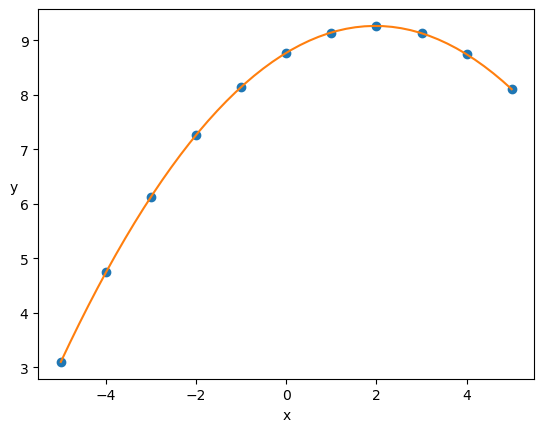

In [47]:
x_p = np.linspace(min(x), max(x))
y_p = trace_poly['α'].mean() + trace_poly['β1'].mean() * x_p + trace_poly['β2'].mean() * x_p**2  + trace_poly['β3'].mean() * x_p**3

plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.plot(x_p, y_p, c='C1')